In [143]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12
import urllib.request as ur
import string

diggy = string.digits + '-.'

def strippy_strip(s):
    ii = None
    for (i, c) in enumerate(s):
        if c not in diggy:
            ii = i
            break
    if ii:
        return s[:ii]
    else:
        return s


def match_to_tuple(s):
    parts = s.split('=')
    name = parts[0].strip()
    val = strippy_strip(parts[1].strip())
    val = float(val)
    return (name, val)

def opa(n):
    if n.startswith('http'):
        return ur.urlopen(n)
    else:
        return open(n, 'rb')

def plot_dcm(flnm):
    logs = {
        'dt': [],
        'yaw': [],
        'pitch': [],
        'roll': []
    }
    freq = None
    t = 0
    with opa(flnm) as f:
        for line in f:
            line = line.decode('latin-1')
            if 'IMU:' not in line:
                continue
            line = line.split('IMU:')[1]
            parts = line.split(';')
            cool_parts = [p for p in parts if (('dt=' in p)
                                           or ('yaw=' in p)
                                           or ('pitch=' in p)
                                           or ('roll=' in p))]          
            try:
                for p in cool_parts:
                    (n, v) = match_to_tuple(p)
                    logs[n].append(v)                
            except Exception as e:
                print('lol, err: {}'.format(e))

    ts = list(np.cumsum(logs['dt']))
    f, axarr = plt.subplots(3, sharex=True)
    m = min(len(v) for v in logs.values())
    axarr[0].plot(ts[:m], logs['yaw'][:m], 'b')
    axarr[1].plot(ts[:m], logs['pitch'][:m], 'g')
    axarr[2].plot(ts[:m], logs['roll'][:m], 'r')
    axarr[0].set_title('yaw')
    axarr[1].set_title('pitch')
    axarr[2].set_title('roll')

In [ ]:
plot_dcm('https://gist.githubusercontent.com/little-arhat/653f5345fe374f552ddc057a530f308c/raw/5202627a67d9e6322131d7ab05309f5ab4c2ec26/static_motion_static_degress.txt') # static

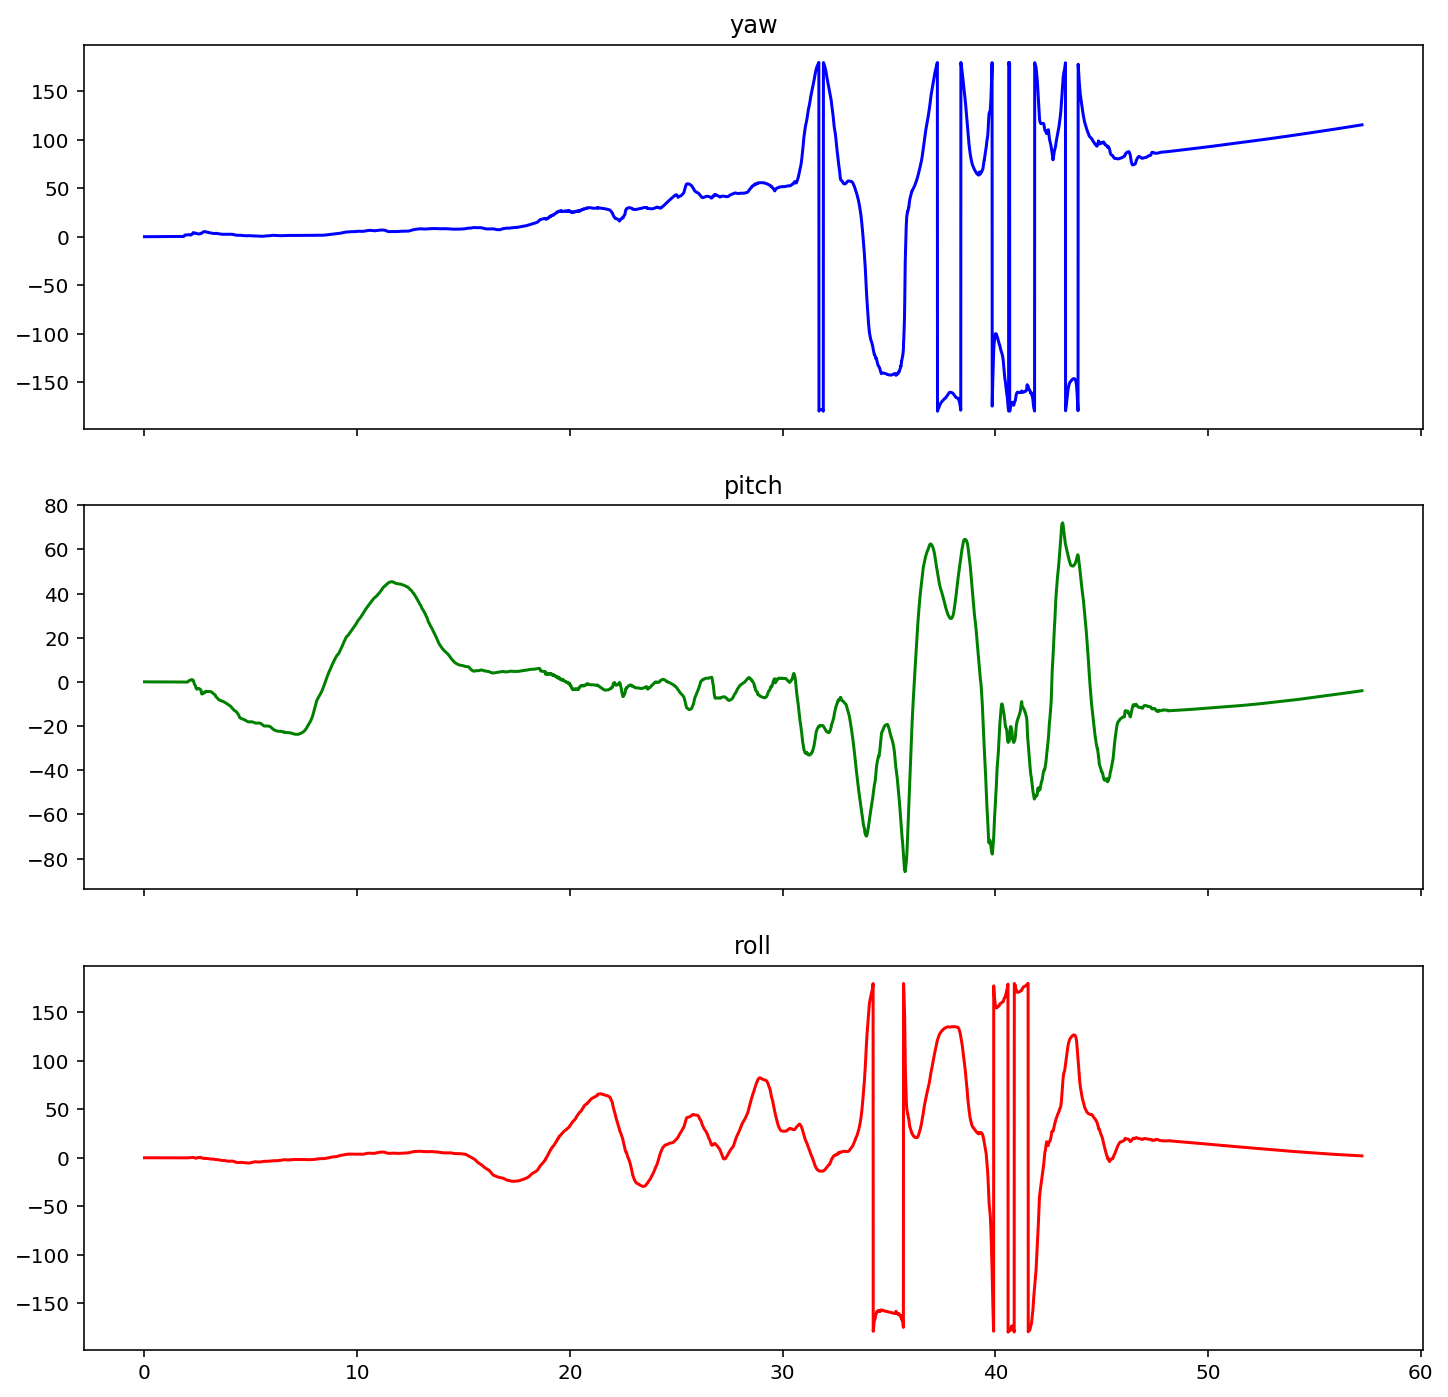

In [145]:
plot_dcm('https://gist.githubusercontent.com/little-arhat/3bb6f4ad2a76c9b28fb78d0ef9bcf4cb/raw/7d49872d300ec9201a2745110f406d81d561bee2/rotate.txt') # flying

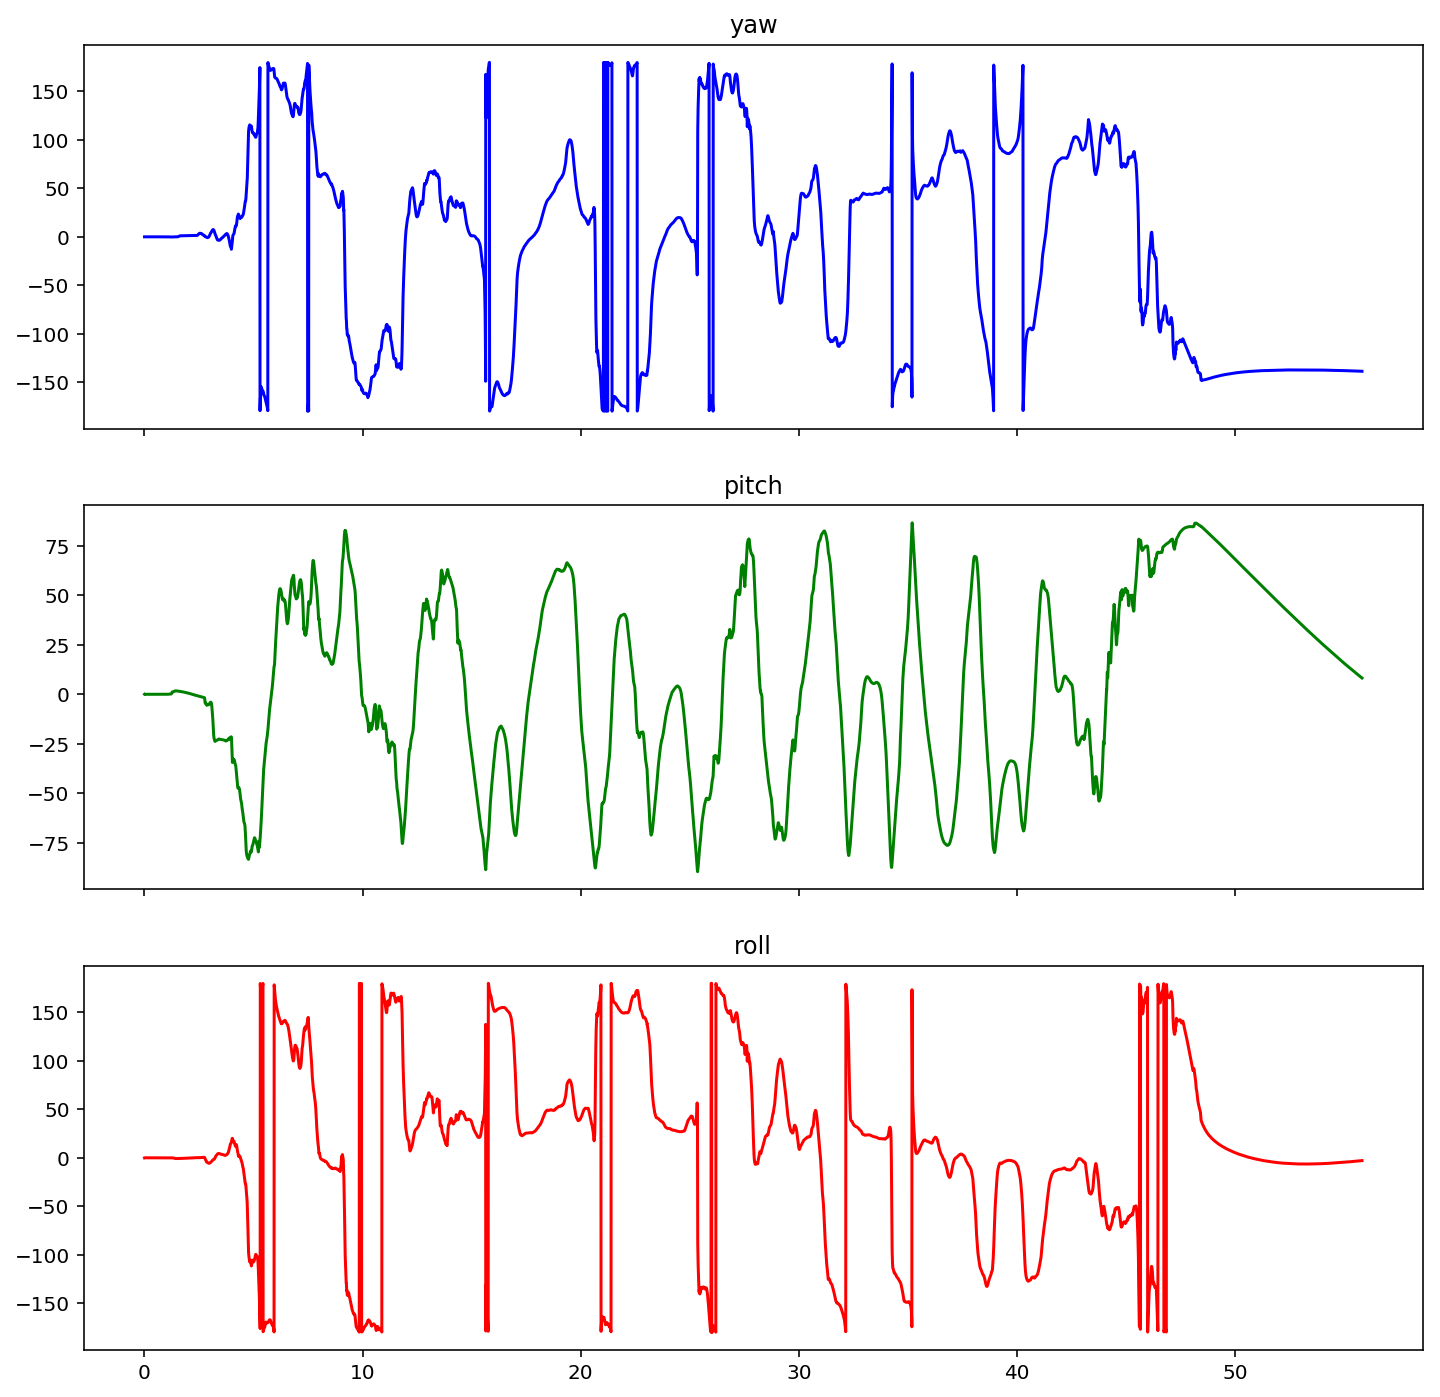

In [146]:
plot_dcm('https://gist.githubusercontent.com/little-arhat/60f89a9b76feea7d2d0429744107dafe/raw/5afcec53ef720fabb003840c181715930a1b8ccc/sun.txt') # swinging